In [16]:
from Kinect import Kinect
import matplotlib.pyplot as plt
from pyntcloud import PyntCloud as pc
import pandas as pd

In [17]:
k = Kinect(debug=True,
           color=True,
           depth=True,
           ir=True,
           registered=True,
           undistorted=True)
k.start()
k.wait_for_init()
point_cloud = k.get_pointcloud()
color = k.get_color_image()
depth = k.get_depth_image()
ir = k.get_ir_image()
registered = k.get_registered_image()
undistorted = k.get_undistorted_image()
k.stop()

Packet pipeline: OpenCLPacketPipeline
Number of devices: 1
Init done


Stopping device
Closing device
Device stopped and closed


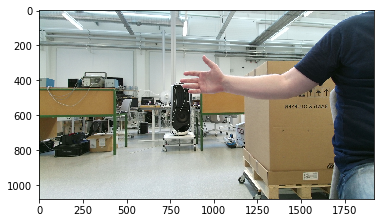

In [18]:
plt.imshow(color)

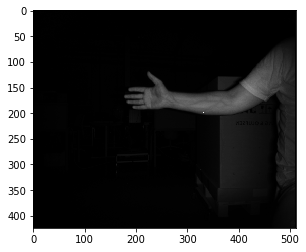

In [19]:
plt.imshow(ir, cmap='gray')

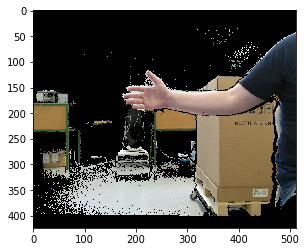

In [20]:
plt.imshow(registered)

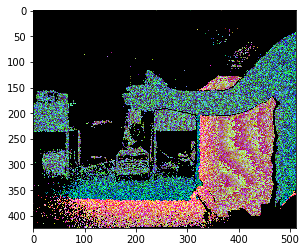

In [21]:
plt.imshow(undistorted)

In [22]:
point_cloud.shape

(101533, 6)

In [23]:
points = pd.DataFrame(point_cloud, columns=['x', 'y', 'z', 'red', 'green', 'blue'])
points.describe()

,x,y,z,red,green,blue
count,101533.000000,101533.000000,101533.000000,101533.000000,101533.000000,101533.000000
mean,-0.100770,1.303150,6.921445,126.007584,117.828676,102.612963
std,2.893361,1.653137,3.772807,73.759158,69.806777,69.533836
min,-8.908689,-7.006983,1.953496,0.000000,0.000000,0.000000
25%,-1.177413,-0.239451,3.181093,48.000000,59.000000,54.000000
50%,1.212362,0.901980,5.622813,148.000000,122.000000,84.000000
75%,1.739739,3.344397,8.681138,182.000000,169.000000,157.000000
max,5.450629,4.362908,17.577656,255.000000,255.000000,255.000000


In [24]:
cloud = pc(points)
cloud.plot(IFrame_shape=(1200, 700))